In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
retail_data=pd.read_csv("OnlineRetail.csv",encoding="ISO-8859-1")
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
print(f"Total Transactions: {retail_data.shape[0]}")

Total Transactions: 541909


In [6]:
retail_data.value_counts("StockCode")

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
40018F       1
16053        1
10134        1
10123G       1
m            1
Name: count, Length: 4070, dtype: int64

In [7]:
retail_data.value_counts("CustomerID")

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
12943.0       1
18184.0       1
18174.0       1
18233.0       1
13135.0       1
Name: count, Length: 4372, dtype: int64

In [12]:
retail_data.isna().any(axis=0)

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [15]:
print(f"Missing description values: {retail_data["Description"].isna().sum()}")

Missing description values: 1454


In [16]:
print(f"Missing Customer IDs: {retail_data["CustomerID"].isna().sum()}")

Missing Customer IDs: 135080


In [22]:
retail_data.dropna(subset=["CustomerID"],inplace=True)

In [23]:
print(f"Missing Customer IDs: {retail_data["CustomerID"].isna().sum()}")

Missing Customer IDs: 0


In [25]:
transactions_in_france=retail_data[retail_data["Country"]=="France"]
transactions_in_france

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [28]:
cancelled_invoices=retail_data[retail_data["InvoiceNo"].astype(str).str.startswith("C")]
cancelled_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [31]:
print(f"Number of cancelled ivoices: {cancelled_invoices["InvoiceNo"].nunique()}")

Number of cancelled ivoices: 3654


In [34]:
retail_data["Revenue"]=retail_data["UnitPrice"]*retail_data["Quantity"]
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [37]:
total_revenue_countrywise=retail_data.groupby("Country")["Revenue"].sum().reset_index(name="TotalRevenue")
total_revenue_countrywise

,Country,TotalRevenue
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [42]:
customers_by_totalrevenue=retail_data.groupby("CustomerID")["Revenue"].sum().reset_index(name="TotalRevenue")
customers_by_totalrevenue

,CustomerID,TotalRevenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [43]:
customers_by_totalrevenue.sort_values(axis=0,by="TotalRevenue",ascending=False).head(5)

,CustomerID,TotalRevenue
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45


In [45]:
products_by_quantity=retail_data.groupby("StockCode")["Quantity"].sum().reset_index(name="TotalQuantity")
products_by_quantity

,StockCode,TotalQuantity
0,10002,823
1,10080,291
2,10120,193
3,10123C,5
4,10124A,16
...,...,...
3679,D,-1194
3680,DOT,16
3681,M,3184
3682,PADS,4


In [47]:
products_by_quantity.sort_values(axis=0,by="TotalQuantity",ascending=False).head(5)

,StockCode,TotalQuantity
2812,84077,53215
1092,22197,48712
3235,85099B,45066
3069,84879,35314
3249,85123A,34204


In [48]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [51]:
retail_data["InvoiceDate"]=pd.to_datetime(retail_data["InvoiceDate"])
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [55]:
retail_data["Month"]=retail_data["InvoiceDate"].dt.month_name()
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December


In [58]:
top_ten_revenue_countries=total_revenue_countrywise.sort_values(by="TotalRevenue",ascending=False).head(10)
top_ten_revenue_countries

,Country,TotalRevenue
35,United Kingdom,6767873.394
23,Netherlands,284661.540
10,EIRE,250285.220
14,Germany,221698.210
13,France,196712.840
0,Australia,137077.270
32,Switzerland,55739.400
30,Spain,54774.580
3,Belgium,40910.960
31,Sweden,36595.910


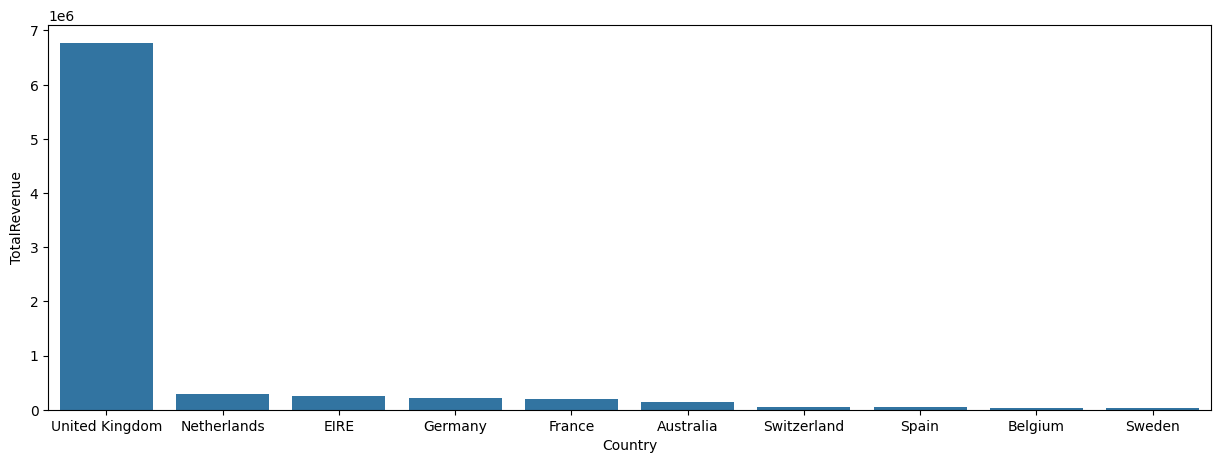

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_ten_revenue_countries,x="Country",y="TotalRevenue")
plt.show()

In [65]:
monthly_total_revenue=retail_data.groupby("Month")["Revenue"].sum().reset_index(name="TotalRevenue")
monthly_total_revenue

,Month,TotalRevenue
0,April,426047.851
1,August,616368.000
2,December,897110.400
3,February,436546.150
4,January,475074.380
5,July,574238.481
6,June,608013.160
7,March,579964.610
8,May,648251.080
9,November,1132407.740


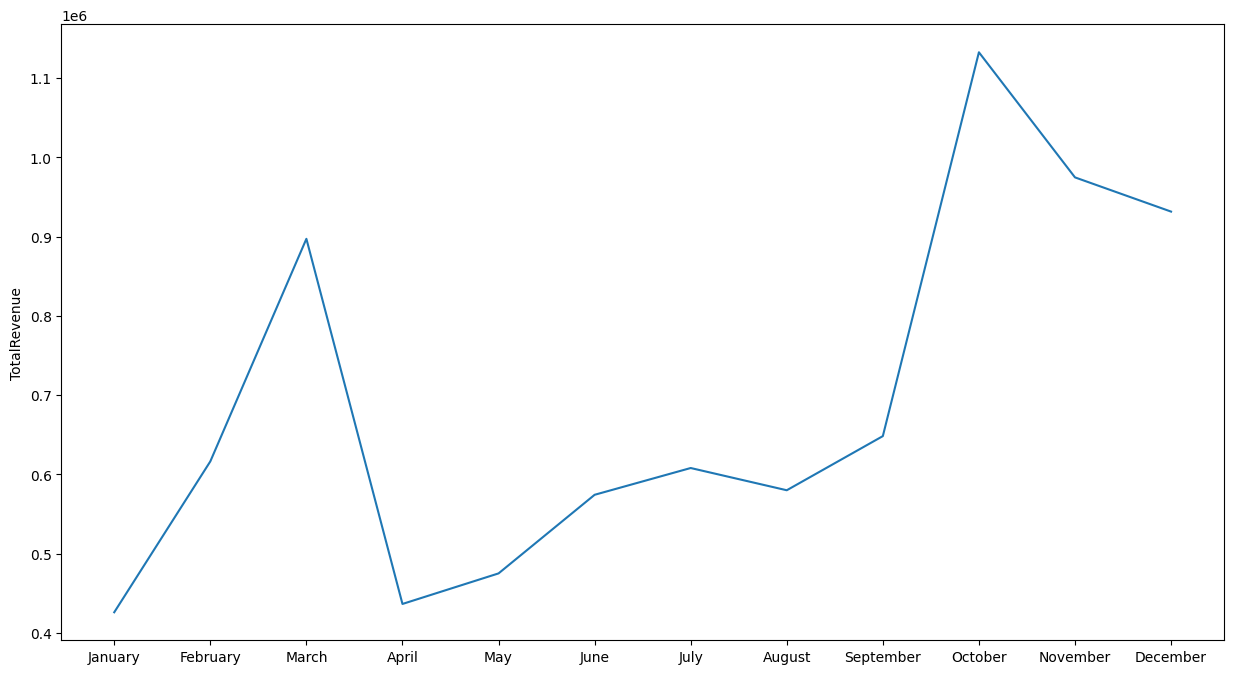

In [67]:
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_total_revenue,x=["January","February","March","April","May","June","July","August","September","October","November","December"],y="TotalRevenue")
plt.show()

In [70]:
transaction_by_country_five=retail_data.value_counts("Country").reset_index(name="TotalTransactions").sort_values(by="TotalTransactions",ascending=False).head(5)
transaction_by_country_five

,Country,TotalTransactions
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


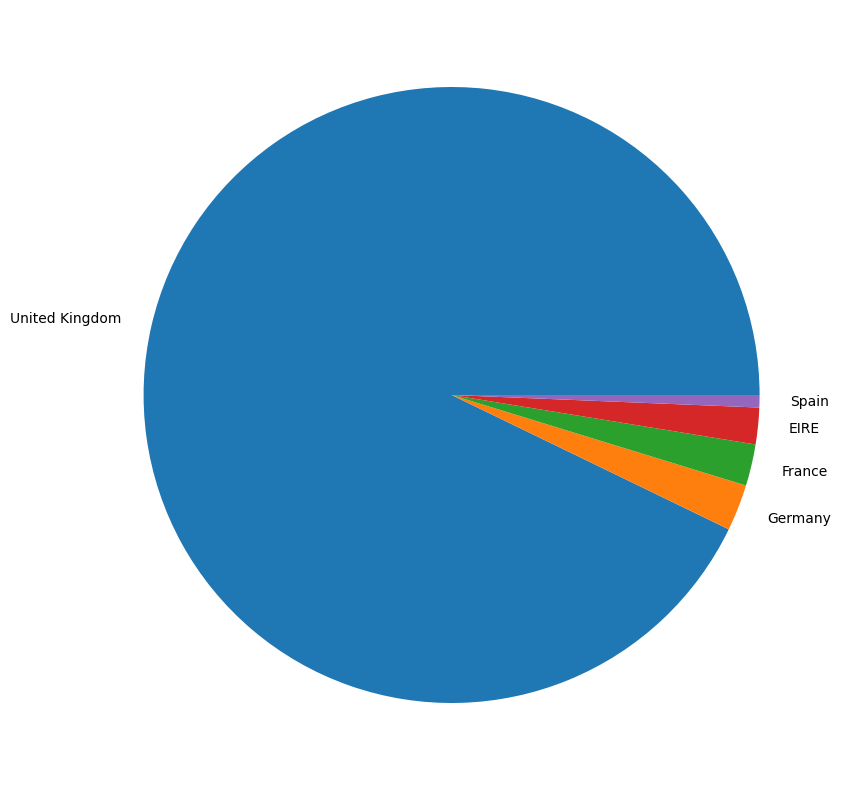

In [73]:
plt.figure(figsize=(10,10))
plt.pie(data=transaction_by_country_five,x="TotalTransactions",labels="Country")
plt.show()